In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2604 - accuracy: 0.9229
Epoch 2/3
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1066 - accuracy: 0.9672
Epoch 3/3
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0724 - accuracy: 0.9772


In [5]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.0963 - accuracy: 0.9690
0.09625237360280008 0.969


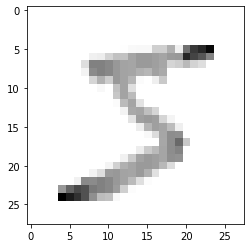

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [11]:
model.save('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model\assets


In [15]:
new_model=tf.keras.models.load_model('num_reader.model')

In [17]:
predictions=new_model.predict(x_test)
print(predictions)

[[5.9758948e-10 4.5471076e-09 5.6435482e-07 ... 9.9999630e-01
  8.7831715e-09 9.3429522e-09]
 [4.3213304e-09 4.6615769e-05 9.9993336e-01 ... 7.6834850e-09
  9.0476709e-07 2.7301345e-11]
 [8.3483798e-07 9.9871600e-01 3.5677105e-05 ... 6.4726511e-04
  2.8121451e-04 2.9231337e-06]
 ...
 [7.8291984e-11 1.3427350e-08 1.1653497e-08 ... 1.2518192e-05
  2.2773841e-07 2.1009178e-05]
 [1.8242572e-07 5.2778933e-07 4.5292399e-08 ... 9.2180301e-07
  2.9000800e-04 2.5255749e-08]
 [4.7310262e-08 2.3562537e-08 6.1862324e-09 ... 1.2016714e-09
  1.5664385e-07 1.7000089e-09]]


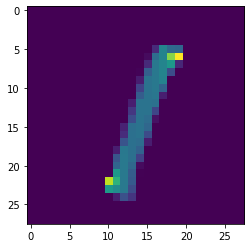

In [22]:
plt.imshow(x_test[5])
plt.show()

In [23]:
print(np.argmax(predictions[5]))

1
